In [4]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [5]:
# Step 1: Load the dataset
file_path = '/Users/drago/CodeAlpha_Intership/Task 2_ TwitterSentimentalAnalysis/train.csv'
data = pd.read_csv(file_path, encoding='latin-1', header=None)
data.columns = ['target', 'ids', 'date', 'flag', 'user', 'text']

In [9]:
data.head()
print(data.shape)

(1600000, 6)


In [13]:
# Step 2: Select 5000 samples for faster processing
sample_data = data.sample(5000, random_state=42).reset_index(drop=True)

print(sample_data.shape)

(5000, 6)


## 

In [16]:
sample_data = sample_data[['target', 'text']]

print(sample_data.shape)

(5000, 2)


In [ ]:
# Map target labels (0 -> negative, 4 -> positive) for simplicity
sample_data['target'] = sample_data['target'].map({0: 0, 4: 1})

In [18]:
# Remove duplicates
sample_data.drop_duplicates(subset='text', inplace=True)

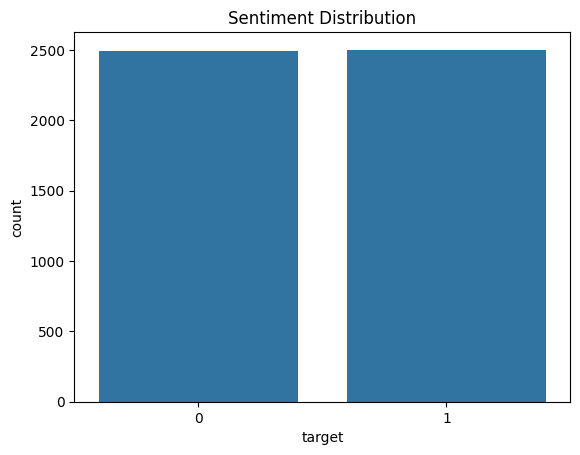

In [19]:
# Step 4: Exploratory Data Analysis (EDA)
# Check the distribution of target labels
sns.countplot(x='target', data=sample_data)
plt.title("Sentiment Distribution")
plt.show()

In [20]:
# Step 5: Split the dataset
X = sample_data['text']
y = sample_data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [21]:
# Step 6: Feature Extraction
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


In [22]:

# Step 7: Build the model
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)


MultinomialNB()

In [23]:
# Step 8: Evaluate the model
y_pred = model.predict(X_test_tfidf)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.705
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.72      0.71       499
           1       0.71      0.69      0.70       501

    accuracy                           0.70      1000
   macro avg       0.71      0.71      0.70      1000
weighted avg       0.71      0.70      0.70      1000



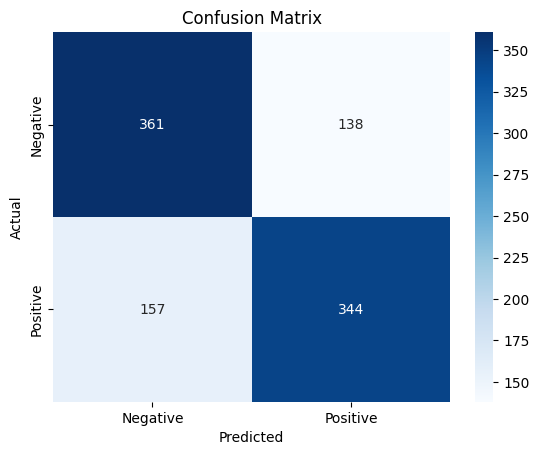

In [24]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

In [25]:
# Step 9: Make predictions
sample_text = ["I love this product!", "I hate this service."]
sample_text_tfidf = vectorizer.transform(sample_text)
predictions = model.predict(sample_text_tfidf)
print("Predictions:", predictions)  # 0 = Negative, 1 = Positive

Predictions: [1 0]
